## Homework 4: Linear models

In this homework you will get more practice in combining data from different sources and in fitting a linear regression model in order to understand the relationship betweem various properties of words and the speed with which people can recognize them.

We will be using the files `ldt_trials.csv` and `word_properties.csv` in the `data` folder. These files contain lexical decision reaction times for each participant and each word (`ldt_trials.csv`) and information about various word properties such as word length, word frequency, concreteness and emotional valence (`word_properties.csv`). These data were obtained from the English Lexicon Project: https://elexicon.wustl.edu/index.html

Your main goal for this homework is to understand how reaction times to recognize a word vary as a function of each of these word properties.

#### Part 1: Loading and organizing the data

Since the reaction times and the word properties are stored in different files, you will have to load them separately, then combine them before analyzing the data. The `ldt_trials.csv` file is in tidy format and each row contains RTs in response to a particular word for a particular participants. The `word_properties.csv` file contains one row per word listing its various properties in columns.

First, load the two datasets. Use the `str`, `heads` and `summary` commands for each dataset in order to understand how they are structured:

In [1]:
trials <- read.csv('ldt_trials.csv')
word_prop <- read.csv('word_properties.csv')

str(trials)
head(trials)
summary(trials)

str(word_prop)
head(word_prop)
summary(word_prop)


'data.frame':	333970 obs. of  8 variables:
 $ Sub_ID    : int  85 85 85 85 85 85 85 85 85 85 ...
 $ Trial     : int  83 84 85 86 87 88 89 90 91 92 ...
 $ Type      : int  0 1 1 1 1 1 1 0 0 0 ...
 $ D_Accuracy: int  1 1 1 1 1 0 1 1 1 0 ...
 $ D_RT      : int  796 1056 541 1215 587 1072 677 1109 2014 1361 ...
 $ D_word    : Factor w/ 80962 levels "a","aah","aal",..: 54285 34192 33191 43038 63606 321 10135 20126 75562 16441 ...
 $ Outlier   : int  0 0 0 0 0 0 0 0 1 0 ...
 $ D_Zscore  : num  0.0531 0.9732 -0.8494 1.5359 -0.6866 ...


,Sub_ID,Trial,Type,D_Accuracy,D_RT,D_word,Outlier,D_Zscore
,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<dbl>
1,85,83,0,1,796,pisect,0,0.053086
2,85,84,1,1,1056,hindquarters,0,0.973239
3,85,85,1,1,541,healthy,0,-0.849372
4,85,86,1,1,1215,loony,0,1.535949
5,85,87,1,1,587,seahorse,0,-0.686576
6,85,88,1,0,1072,abysmal,0,1.029864


     Sub_ID           Trial           Type       D_Accuracy      
 Min.   :  1.00   Min.   :   1   Min.   :0.0   Min.   :  0.0000  
 1st Qu.: 26.00   1st Qu.: 844   1st Qu.:0.0   1st Qu.:  1.0000  
 Median : 51.00   Median :1687   Median :0.5   Median :  1.0000  
 Mean   : 50.91   Mean   :1687   Mean   :0.5   Mean   :  0.8688  
 3rd Qu.: 76.00   3rd Qu.:2531   3rd Qu.:1.0   3rd Qu.:  1.0000  
 Max.   :100.00   Max.   :3374   Max.   :1.0   Max.   :120.0000  
                                                                 
      D_RT             D_word          Outlier           D_Zscore      
 Min.   :   1.0   aback   :     5   Min.   :0.00000   Min.   :-4.0400  
 1st Qu.: 619.0   abacus  :     5   1st Qu.:0.00000   1st Qu.:-0.5500  
 Median : 771.0   abards  :     5   Median :0.00000   Median :-0.0793  
 Mean   : 907.5   abbed   :     5   Mean   :0.03758   Mean   : 0.2139  
 3rd Qu.:1045.0   abbede  :     5   3rd Qu.:0.00000   3rd Qu.: 0.6632  
 Max.   :4000.0   Abbeluia:     5   Max.

'data.frame':	8710 obs. of  5 variables:
 $ Word               : Factor w/ 8710 levels "abandon","abdomen",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Length             : int  7 7 9 9 5 7 4 8 5 8 ...
 $ SUBTLWF            : num  8.1 3.35 3.41 3.63 2.71 ...
 $ Concreteness_Rating: num  2.54 4.7 4.28 3.07 1.68 1.81 2.38 2.14 2.83 3.41 ...
 $ Emotional_Valence  : num  2.84 5.43 4.48 2.05 5.52 7 6.64 3.53 3.1 2.58 ...


,Word,Length,SUBTLWF,Concreteness_Rating,Emotional_Valence
,<fct>,<int>,<dbl>,<dbl>,<dbl>
1,abandon,7,8.10,2.54,2.84
2,abdomen,7,3.35,4.70,5.43
3,abdominal,9,3.41,4.28,4.48
4,abduction,9,3.63,3.07,2.05
5,abide,5,2.71,1.68,5.52
6,ability,7,19.22,1.81,7.00


        Word          Length          SUBTLWF        Concreteness_Rating
 abandon  :   1   Min.   : 2.000   Min.   :   1.00   Min.   :1.120      
 abdomen  :   1   1st Qu.: 5.000   1st Qu.:   1.76   1st Qu.:2.410      
 abdominal:   1   Median : 7.000   Median :   3.86   Median :3.400      
 abduction:   1   Mean   : 6.854   Mean   :  32.05   Mean   :3.384      
 abide    :   1   3rd Qu.: 8.000   3rd Qu.:  12.10   3rd Qu.:4.380      
 ability  :   1   Max.   :14.000   Max.   :6161.41   Max.   :5.000      
 (Other)  :8704                                                         
 Emotional_Valence
 Min.   :1.300    
 1st Qu.:4.370    
 Median :5.320    
 Mean   :5.165    
 3rd Qu.:6.100    
 Max.   :8.530    
                  

We now want to merge the two datasets such that we have the properties of each word listed in every row of the `ldt_trial.csv`. Use the `left_join()` command from the `tidyverse` package to join the two datasets. You have to specify which column you are mergin by. In this case, the columns `Word` in the `word_properties` dataset and the column `D_word` in the `ldt_trials` dataset should be used for the merging (hint: read the documentation of the `left_join()` function to understand how the `by=c()` argument works). Join the two datasets by the respective columns and save the output in a new variable:

In [2]:
library(tidyverse)

trials_merged <- left_join(trials, word_prop, by = c('D_word'= 'Word'))
head(trials_merged)


Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

Warning message:
“package ‘ggplot2’ was built under R version 3.6.2”
Warning message:
“package ‘tibble’ was built under R version 3.6.2”
Warning message:
“package ‘purrr’ was built under R version 3.6.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



,Sub_ID,Trial,Type,D_Accuracy,D_RT,D_word,Outlier,D_Zscore,Length,SUBTLWF,Concreteness_Rating,Emotional_Valence
,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,85,83,0,1,796,pisect,0,0.053086,NA,NA,NA,NA
2,85,84,1,1,1056,hindquarters,0,0.973239,NA,NA,NA,NA
3,85,85,1,1,541,healthy,0,-0.849372,7,24.75,3.31,7.76
4,85,86,1,1,1215,loony,0,1.535949,5,2.41,2.15,4.48
5,85,87,1,1,587,seahorse,0,-0.686576,NA,NA,NA,NA
6,85,88,1,0,1072,abysmal,0,1.029864,NA,NA,NA,NA


You will notice that we do not have word characteristics for every word that the participants were tested (e.g., there are many NA values in the Length, Concreteness, etc, columns of the new merged dataset. Filter the new dataset and save it to a new variable so that the new dataset only has rows for which word characteristics are present (hint: you can use the `!is.na(column_name)` argument in the filter command to remove all rows in which `column_name` has NA values:

In [3]:
nrow(trials_merged)
sum(is.na(trials_merged))

[1] 333970

[1] 1191968

In [11]:
trials_clean <- filter(trials_merged, !is.na(Length) & !is.na(SUBTLWF)& !is.na(Concreteness_Rating) & !is.na(Emotional_Valence))

#trials_clean <- na.omit(trials_merged)


After these operations the final dataset should have 35978 rows. Use the `nrow()` command to confirm this. Use the `heads()` command to take a look at the dataset:

In [13]:
nrow(trials_clean)
head(trials_clean)


[1] 35978

,Sub_ID,Trial,Type,D_Accuracy,D_RT,D_word,Outlier,D_Zscore,Length,SUBTLWF,Concreteness_Rating,Emotional_Valence
,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,85,85,1,1,541,healthy,0,-0.849372,7,24.75,3.31,7.76
2,85,86,1,1,1215,loony,0,1.535949,5,2.41,2.15,4.48
3,85,89,1,1,677,cart,0,-0.368061,4,9.04,4.89,5.37
4,85,100,1,1,659,blunt,0,-0.431764,5,4.90,3.07,4.65
5,85,101,1,1,532,thousand,0,-0.881224,8,69.29,3.08,6.44
6,85,111,1,1,597,lyrics,0,-0.651186,6,5.08,3.86,6.42


The column `Sub_ID` contains the ID number for the different participants. How many participants are there in this experiment? (hint: you can combine the `unique()` and `length()` commands to answer this question):

In [24]:
trials_u <- unique(trials_clean$Sub_ID)
length(trials_u)

str(trials_u)

#Answer: 99

[1] 99

 int [1:99] 85 21 29 51 83 86 64 57 48 43 ...


On average, how many observations are there for each participant? Calculate the mean and standard deviation of the number of observations per participant using the `group_by()` and `summarize()` commands:

In [71]:
trials_clean %>% group_by(Sub_ID) %>% summarise(n= n(), mean(D_RT), sd(D_RT))



Sub_ID,n,mean(D_RT),sd(D_RT)
<int>,<int>,<dbl>,<dbl>
1,360,511.2028,92.81881
2,352,820.6165,308.13896
3,374,704.1043,260.31855
4,392,577.6122,196.05773
5,347,622.0403,206.04727
6,381,797.4409,267.55913
7,372,1148.1102,913.25450
8,370,1124.9784,485.91578
9,380,620.7158,257.44168


#### Part 2: Visualize and understand the data

For each of the word properties (Length, SUBTLWF, Concreteness_Rating, Emotional_Valence), plot a scatterplot how the lexical decision reaction times (`D_RT`) changes. Fit a smooth line through the plot with the `geom_smooth()` command in the `ggplot` (hint: use the `stat_summary()` command of the ggplot call to summarise the y axis for each x axis point. hint2: for SUBTLWF, which is word frequency, first round the variable to remove the decimal point values -  e.g., `ggplot(newdf, aes(round(SUBTLWF), D_RT))`); for concretness and emotional valence, try plotting before and after rounding the x axis. For SUBTWLF, plot the data after transforming it to a logarithm.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



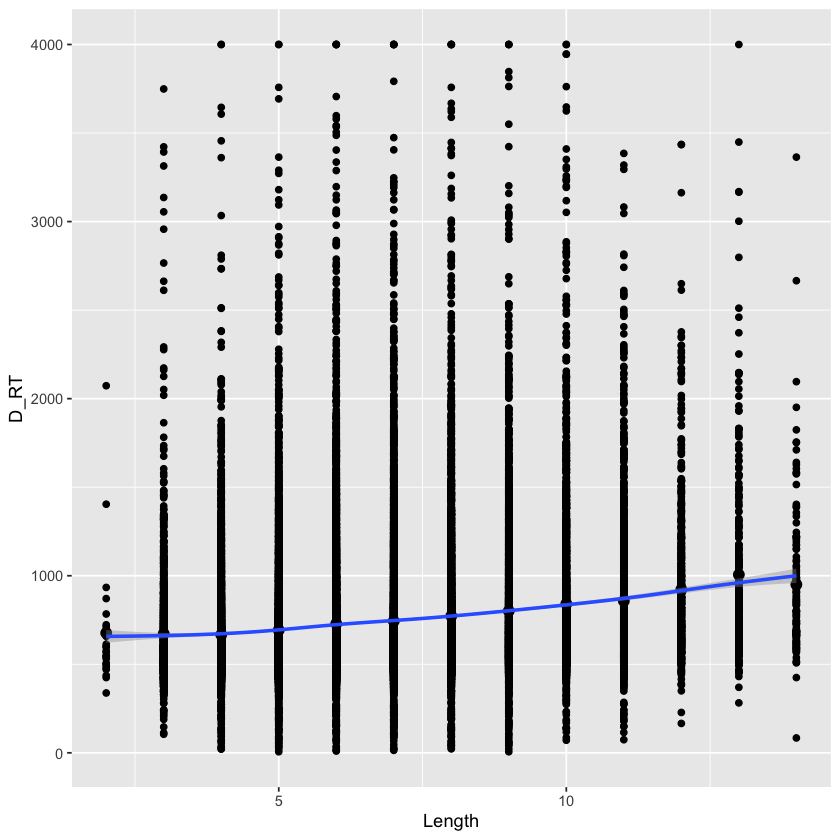

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



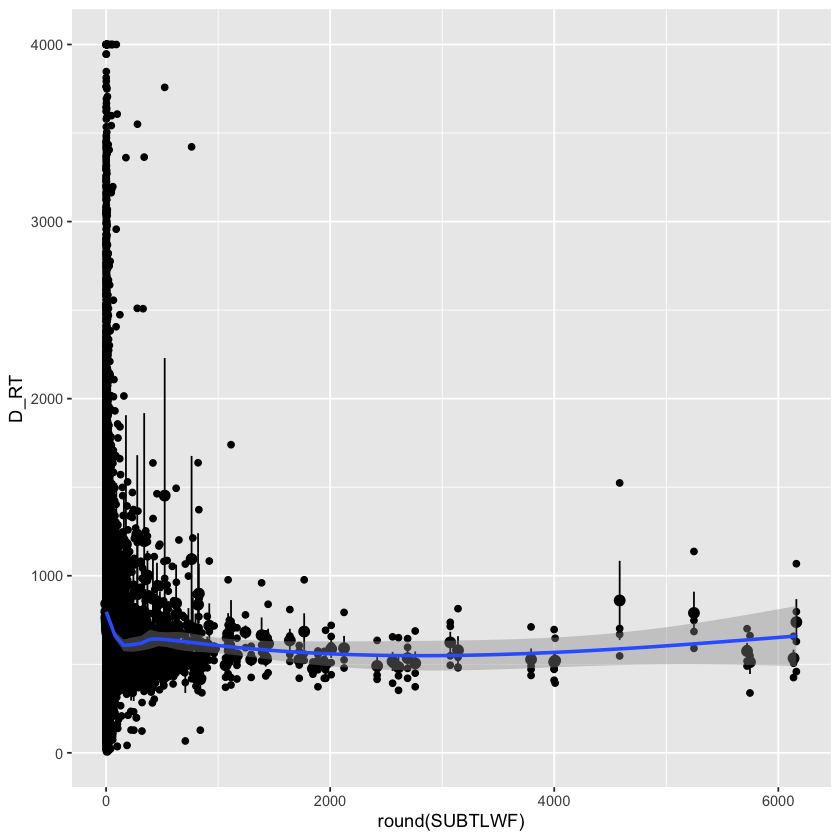

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



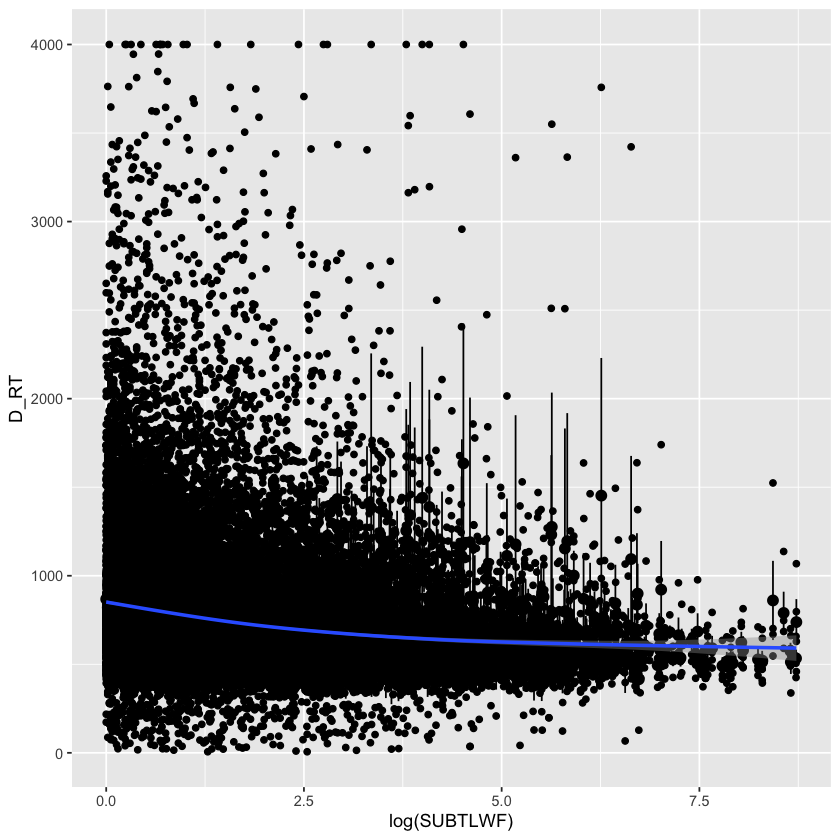

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Computation failed in `stat_smooth()`:
x has insufficient unique values to support 10 knots: reduce k.”


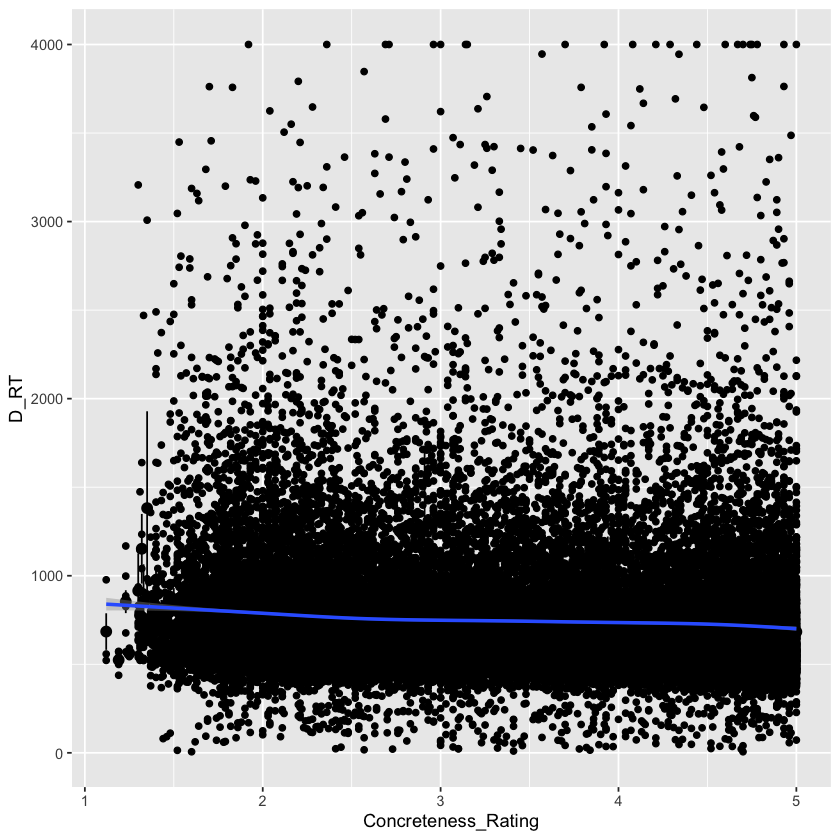

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



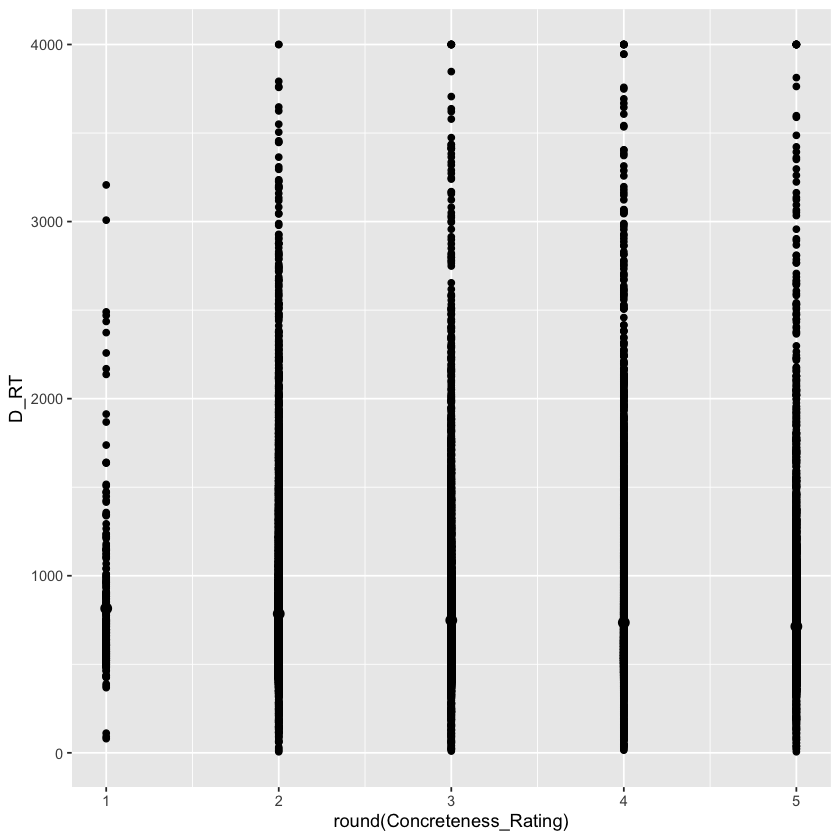

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Computation failed in `stat_smooth()`:
x has insufficient unique values to support 10 knots: reduce k.”


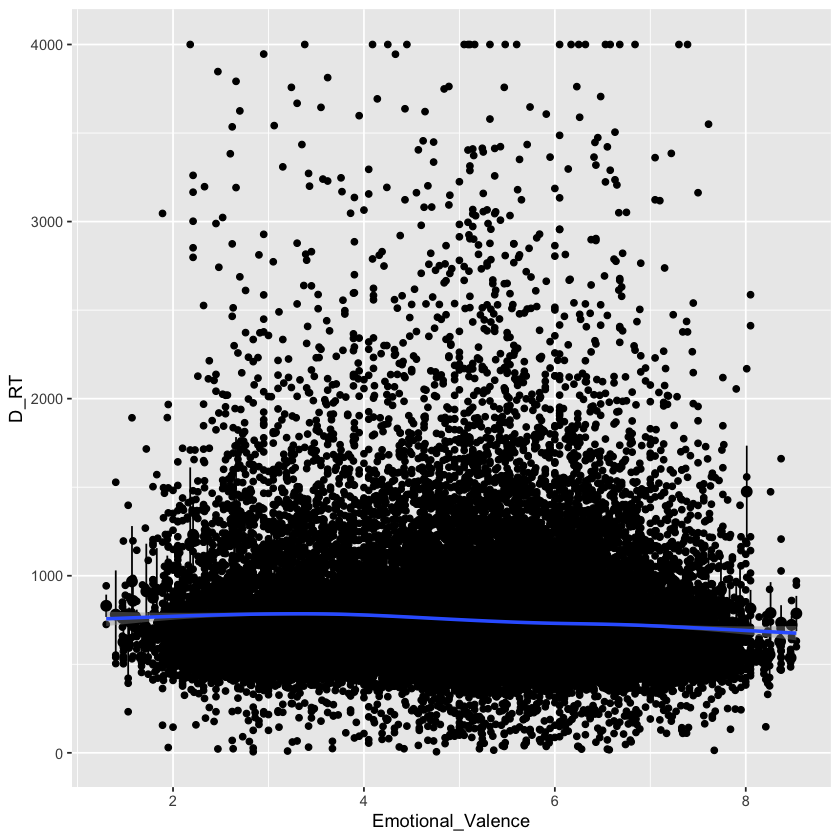

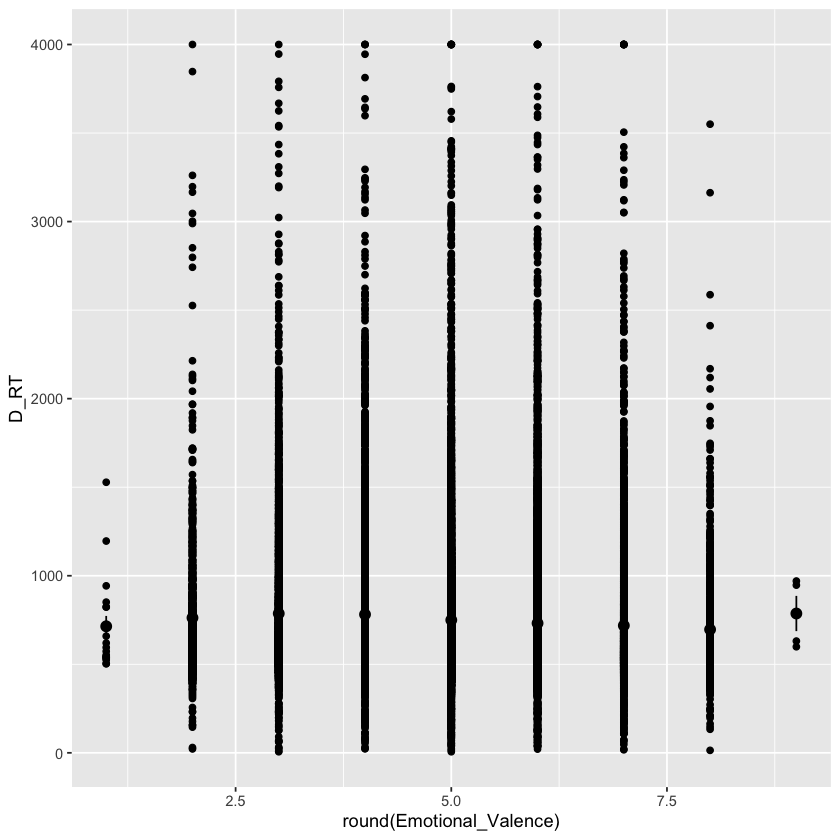

In [42]:
ggplot(trials_clean, aes(x= Length, y= D_RT)) + geom_point() + stat_summary(fun.data=mean_se) + geom_smooth()
ggplot(trials_clean, aes(x= round(SUBTLWF), y= D_RT)) + geom_point() + stat_summary(fun.data=mean_se) + geom_smooth()
ggplot(trials_clean, aes(x= log(SUBTLWF), y= D_RT)) + geom_point() + stat_summary(fun.data=mean_se) + geom_smooth()
ggplot(trials_clean, aes(x= Concreteness_Rating, y= D_RT)) + geom_point() + stat_summary(fun.data=mean_se) + geom_smooth()
ggplot(trials_clean, aes(x= round(Concreteness_Rating), y= D_RT)) + geom_point()  + stat_summary(fun.data=mean_se) + geom_smooth()
ggplot(trials_clean, aes(x= Emotional_Valence, y= D_RT)) + geom_point() + stat_summary(fun.data=mean_se) + geom_smooth()
ggplot(trials_clean, aes(x= round(Emotional_Valence), y= D_RT)) + geom_point() + stat_summary(fun.data=mean_se)+ geom_smooth()



Based on the previous plots, for which of these predictions would a linear regression be a good model of reaction times? Why/why not?

Length: There is a linear relation visible, but the variance of the data is higher above the regression-line, so the residuals do not seem to be normally distributed.
SUBTLWF: If transformed to logarithm, a slight linear relationship is visible, but here it seems that homoscedasticity of the residualis is not given.
Concreteness_Rating: Here a linear relationship is visible, but again the variance above the line is much higher, so the residuals do not seem to be normally distributed.
Emotional_Valence: Also here a linear relationship is visible, but again the residuals do not seem to be normally distributed and maby also homoscedasticity of the residualis is not given.

All of the predictor seem not to fullfill the requirement of alinear regression, more tests would be needed.



To what degree are the 4 predictors correlated with each other?

In [34]:
cor(trials_clean[,c('Length', 'SUBTLWF', 'Concreteness_Rating', 'Emotional_Valence')])

#they are correlated to a low degree

,Length,SUBTLWF,Concreteness_Rating,Emotional_Valence
Length,1.00000000,-0.14505419,-0.31793980,-0.01753049
SUBTLWF,-0.14505419,1.00000000,-0.03162817,0.07856745
Concreteness_Rating,-0.31793980,-0.03162817,1.00000000,0.07556639
Emotional_Valence,-0.01753049,0.07856745,0.07556639,1.00000000


#### Part 3: Fit a linear model

Use the `lm` command to fit a linear regression to the `D_RT` variable using the four predictors. Assign the output to a new variable called `ml1`. Use the `summary(ml1)` command to display the output of the model:


In [38]:

lm1<- lm(D_RT~Length+ SUBTLWF+Concreteness_Rating+ Emotional_Valence, data = trials_clean)
summary(lm1)


Call:
lm(formula = D_RT ~ Length + SUBTLWF + Concreteness_Rating + 
    Emotional_Valence, data = trials_clean)

Residuals:
   Min     1Q Median     3Q    Max 
-853.4 -195.5  -93.9   74.2 3330.1 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         667.074558  12.426760  53.680  < 2e-16 ***
Length               26.415737   0.892603  29.594  < 2e-16 ***
SUBTLWF              -0.040145   0.009348  -4.295 1.75e-05 ***
Concreteness_Rating  -6.209688   1.902962  -3.263   0.0011 ** 
Emotional_Valence   -15.062538   1.436979 -10.482  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 359.7 on 35973 degrees of freedom
Multiple R-squared:  0.03429,	Adjusted R-squared:  0.03418 
F-statistic: 319.3 on 4 and 35973 DF,  p-value: < 2.2e-16


What is the intercept value and the slope for the word length predictor? Explain what these values means:

The value for teh intercept is 667.07, which means if the length of the word is 0, the reaction time would be 667.07 ms.
The vaule for the slope is 26.42, which means for an increase of the length of the word by 1 unit (1 letter) the reactiontime increases 26.42 ms(?).

What is the R-squared value? What does this mean?
> The R-Squared is: 0.03429. It means, that 3.4% of the Variance in y is explained by the predictors, which is very low. 

As you noticed, the R-squared value is really low. This is because there is a lot of individual differences in how fast people react. These differences cannot be explained by word characteristics. One way to account for individual differences is to summarize the data over participants, and obtain the average RTs for each word. Let's do this and refit the model.

First, use the `group_by` and `summarise` commands to calculate the average RT for each word. In order to keep the word characteristics, include those columns in the `group_by` call. E.g.: `group_by(D_word, Length, SUBTLWF, Concreteness_Rating, Emotional_Valence)`. Save the result to a new variable. Use the `heads` command to look at the data:

In [72]:
RT_per_word <- trials_clean %>% group_by(D_word, Length, SUBTLWF, Concreteness_Rating, Emotional_Valence) %>% summarise(Mean = mean(D_RT), Sd = sd(D_RT))

head(RT_per_word)



`summarise()` has grouped output by 'D_word', 'Length', 'SUBTLWF', 'Concreteness_Rating'. You can override using the `.groups` argument.



D_word,Length,SUBTLWF,Concreteness_Rating,Emotional_Valence,Mean,Sd
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
abandon,7,8.10,2.54,2.84,1175.5000,797.3667
abdomen,7,3.35,4.70,5.43,778.6667,239.8256
abdominal,9,3.41,4.28,4.48,833.4000,287.5001
abduction,9,3.63,3.07,2.05,708.0000,119.5715
abide,5,2.71,1.68,5.52,602.2500,102.9866
ability,7,19.22,1.81,7.00,654.2500,218.8293


Now, fit the linear model again using the summarised data. Do the estimates of intercept and slope differ much from the previous model? How about the R-squared value? If so, why do you think that is the case?

In [69]:
lm2<- lm(Mean~Length+ SUBTLWF+Concreteness_Rating+ Emotional_Valence, data = RT_per_word)
summary(lm2)


Call:
lm(formula = Mean ~ Length + SUBTLWF + Concreteness_Rating + 
    Emotional_Valence, data = RT_per_word)

Residuals:
    Min      1Q  Median      3Q     Max 
-459.92 -128.20  -42.25   78.34 1653.93 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         667.42698   13.40956  49.772  < 2e-16 ***
Length               26.51743    0.96339  27.525  < 2e-16 ***
SUBTLWF              -0.03931    0.01004  -3.915  9.1e-05 ***
Concreteness_Rating  -6.32646    2.05367  -3.081  0.00207 ** 
Emotional_Valence   -15.06291    1.55261  -9.702  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 191.1 on 8705 degrees of freedom
Multiple R-squared:  0.1124,	Adjusted R-squared:  0.112 
F-statistic: 275.5 on 4 and 8705 DF,  p-value: < 2.2e-16


No, the intercept and slopes do not differ much from the previous model. The R-squared value is higher now: 0.1124. This means that now 11.2% of the variance in the mean reactiontime per word can be explaines by the word characteristics. I think this model explains more variance, because the individual differences are summarized over the participants, so the variance of the variable RT got smaller (less disturbance by individual differnces).

Finally, change the predictor for the SUBTLWF to be the log(SUBTLWF) value. Does the R-squared increase? Why/why not?

In [70]:
lm3<- lm(Mean~Length+ log(SUBTLWF)+Concreteness_Rating+ Emotional_Valence, data = RT_per_word)
summary(lm3)


Call:
lm(formula = Mean ~ Length + log(SUBTLWF) + Concreteness_Rating + 
    Emotional_Valence, data = RT_per_word)

Residuals:
    Min      1Q  Median      3Q     Max 
-424.41 -124.05  -38.05   75.66 1713.44 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         742.0081    13.5267  54.855  < 2e-16 ***
Length               19.9617     0.9846  20.274  < 2e-16 ***
log(SUBTLWF)        -32.5164     1.5086 -21.554  < 2e-16 ***
Concreteness_Rating  -8.0244     1.9977  -4.017 5.95e-05 ***
Emotional_Valence    -9.1901     1.5376  -5.977 2.36e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 186.4 on 8705 degrees of freedom
Multiple R-squared:  0.1559,	Adjusted R-squared:  0.1555 
F-statistic: 401.8 on 4 and 8705 DF,  p-value: < 2.2e-16


Yes the R-squared value increased on 0.1559. It means, that in this model 15.6% of the variance in average reaction time per word is explained by word characteristics. It increased because the variable (SUBTLWF) showes a logarithmic distribution and to transform SUBTLWF in to logarithm provides a better fit for the linear model.